# Hypothesis Testing project
**Beibarys Nyussupov, Joseph Tadros, Luke Ducker**

In this project, we demonstrate the essential skills involved in hypothesis testing. To do so, we 
will use a real dataset that stems from a replication attempt of published research [(Wallisch & Whritner, 
2017)](https://github.com/NBeibarys/Project-Hypothesis-Testing-of-MovieRatings-Using-Python/blob/main/project_guidelines/Wallisch%20%26%20Whritner%202017%20Movies%20-%20Copy.pdf). 

To answer hypothesis testing questions and to cut down false positives, we set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018). 

## Dataset description:
This dataset features ratings data of 400 movies from 1097 research participants.  
- `1st row: Headers (Movie titles/questions)` – note that the indexing in this list is from 1  

- `Row 2-1098: Responses from individual participants`

- `Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)` 

- `Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)` 

- `Columns 422-464: These columns contain responses to personality questions (1-5)` 

- `Columns 465-474: These columns contain self-reported movie experience ratings (1-5)`

- `Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)`

- `Column 476: Only child (1 = yes, 0 = no, -1 = no response)`

- `Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)` 

## Questions: 
1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that 
are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]   
2) Are movies that are newer rated differently than movies that are older? 
3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 
4) What proportion of movies are rated differently by male and female viewers? 
5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings? 
6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings 
vs. those without?  
7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who 
prefer to watch them alone? 
8) What proportion of movies exhibit such a “social watching” effect? 
9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  
10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana 
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these 
are of inconsistent quality, as experienced by viewers? 

Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the 
movies in this dataset that is not already covered by the questions above [for 5% of the grade score]. 

In [1]:
# useful functions 

# simple significance test interpretation
def significance(alpha, p_value):
    """
    Decide based on alpha. 
    Note: p is the probability, under H0, of observing a statistic at least this extreme.

    """
    if p_value < alpha:
        print(f"p = {p_value:.6g} < α = {alpha} = Reject H0 (statistically significant).")
    else:
        print(f"p = {p_value:.6g} ≥ α = {alpha} = Fail to reject H0 (not statistically significant).")

# bar plot function
def bar_plot(x_values, y_values, title, xlabel, ylabel):
    # Create new dataframe with gender counts - will make it easier to plot
    df_bars = pd.DataFrame({
        "x": x_values,
        "y": y_values
    })

    ax = df_bars.plot(kind="bar", x="x", y="y", legend=False)  # Bar plot
    ax.bar_label(ax.containers[0])  # Add value labels on top of each bar
    plt.xticks(rotation=0)  # Keep x tick labels horizontal
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# normalized mean rank function
def normalized_mean_rank(series, method="average"):
    """
    """
    rank_data = stats.rankdata(series, method=method)
    max_rank_data = np.max(rank_data)
    return np.mean(rank_data) / max_rank_data

# franchise analysis function
def franchise_analysis(df, franchise_name):
    """
    """

    # empty lists to hold movie names and movie data
    franchise_movies = []
    franchise_survey_data = []
    franchise_mean_normalized_ranks = []
    franchise_medians = []
    franchise_means = []

    # get all movies of same franchise
    for col in df.columns:
        if franchise_name in col:
            movie_data = df[col].copy().dropna()  # get data for movie
            franchise_movies.append(col)  # add column name to list
            franchise_survey_data.append(movie_data)  # add movie data to list
            franchise_mean_normalized_ranks.append(normalized_mean_rank(movie_data))
            franchise_medians.append(movie_data.median())
            franchise_means.append(movie_data.mean())
    
    # run test
    H, p = stats.kruskal(*franchise_survey_data)

    # collate results into singular dictionary to return
    results = {
        "franchise": franchise_name,
        "movies": franchise_movies,
        "mean_normalized_ranks": franchise_mean_normalized_ranks,
        "median_ratings": franchise_medians,
        "average_ratings": franchise_means,
        "p": p,
        "H": H
    }

    return results
    

In [3]:
# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import cliffs_delta

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.analysis_helpers import side_by_side_bar_plot, get_value_counts, distribution_plots

# reproducibility 
import random
random.seed(42)
np.random.seed(42)


Let's explore and clean the data before starting any analysis. 

In [4]:
# import the data 
df = pd.read_csv("..\data\movieReplicationSet.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nyuss\AppData\Local\Temp\ipykernel_24548\948917265.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\movieReplicationSet.csv")


In [5]:
# first rows of the data
df.head(5)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [6]:
# descriptive statistics 
df.describe()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
count,76.000000,71.000000,453.000000,289.000000,463.000000,128.000000,182.000000,254.000000,137.000000,588.000000,...,1077.000000,1073.000000,1078.000000,1075.000000,1074.000000,1077.000000,1079.000000,1073.000000,1097.000000,1097.000000
mean,2.151316,2.021127,3.153422,2.707612,2.778618,2.597656,2.365385,2.899606,2.496350,2.911565,...,2.763231,3.100652,2.234694,4.446512,4.259777,3.319406,2.159407,1.253495,0.137648,0.533273
std,1.166247,1.141542,0.916403,1.153261,0.906993,1.019608,1.028468,1.062643,1.020914,0.969203,...,1.499884,1.462571,1.242105,1.254294,1.248493,1.246603,1.275058,0.447890,0.407743,0.542900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,3.000000,2.000000,2.500000,2.000000,1.500000,2.500000,2.000000,2.500000,...,1.000000,2.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2.500000,2.000000,3.500000,3.000000,3.000000,3.000000,2.500000,3.000000,2.500000,3.000000,...,3.000000,3.000000,2.000000,5.000000,4.000000,3.000000,2.000000,1.000000,0.000000,1.000000
75%,3.000000,3.000000,4.000000,3.500000,3.500000,3.500000,3.000000,3.875000,3.000000,3.500000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.000000,1.000000,0.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,1.000000,1.000000


In [7]:
# check number of null values in each column
print(f'Number of null values in each column:\n{df.isna().sum()}\n')
print(f'Percentage of null values in each column:\n{df.isna().mean()}\n')

Number of null values in each column:
The Life of David Gale (2003)                                              1021
Wing Commander (1999)                                                      1026
Django Unchained (2012)                                                     644
Alien (1979)                                                                808
Indiana Jones and the Last Crusade (1989)                                   634
                                                                           ... 
Movies change my position on social economic or political issues             20
When watching movies things get so intense that I have to stop watching      18
Gender identity (1 = female; 2 = male; 3 = self-described)                   24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0
Length: 477, dtype: int64

Percentage of null values in each column:
The Life of D

As we can see, most of the columns have a lot of null values - especially for movie ratings. 
It is logical, since some movies might not have been seen by some people in the data. 

However, we can not just remove null values as it will just lead to a loss of huge amounts of data. 
We will have to eliminate null values with element-wise approach, separately in each question. 
Right now it will be easier if we strip all column names from spaces in the beginning and in the end, and lowercase all column names for easier data manipulation.

In [8]:
# strip - removing spaces in the beginning and in the end
# lower - making all letters in columns names lowercase
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'when watching a movie i cheer or shout or talk or curse at the screen',
       'when watching a movie i feel like the things on the screen are happening to me',
       'as a movie unfolds i start to have problems keeping track of events that happened earlier',
       'the emotions on the screen "rub off" on me - for instance if something sad is happening i get sad or if something frightening is happening i get scared',
       'when watching a movie i get completely immersed in the alternative reality of the film',
       'movies change my position on social economic or political issues',
       'when watching movies things get so intense that i have to stop watching',
 

## Question 1: Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

Here we used standardised rank transformations to eliminate 'psychological differences' in movie raters. The rank transform was standardised to a 0-1 scale with 1 being the movie which is rated highest by that user

In [9]:
# copy the data for question 1 to avoid changes 
q1_df = df.copy()

# save movie columns for later use
movie_columns = q1_df.columns[:400]

# apply filtering leaving only movie ratings 
rating_data = q1_df[movie_columns]

# apply standardized ranking transformations 
ranked_data = rating_data.rank(axis=1, method='average', na_option='keep')
standardized_ranks = ranked_data.div(ranked_data.max(axis=1), axis=0)

# compute average rank and popularity for each movie
avg_rank = standardized_ranks.mean()
popularity = rating_data.notna().sum()
# determine median popularity and group movies
median_popularity = popularity.median()
popularity_group = popularity.apply(lambda x: 'High' if x >= median_popularity else 'Low')

# combine into a summary DataFrame
movie_stats = pd.DataFrame({
    'movie': movie_columns,
    'avg_rank': avg_rank.values,
    'num_ratings': popularity.values,
    'popularity_group': popularity_group.values
})

# separate into two groups
high_pop = movie_stats[movie_stats['popularity_group'] == 'High']['avg_rank']
low_pop = movie_stats[movie_stats['popularity_group'] == 'Low']['avg_rank']


After the data was grouped, we plot the distribution of movie ranks for high and low popularity.

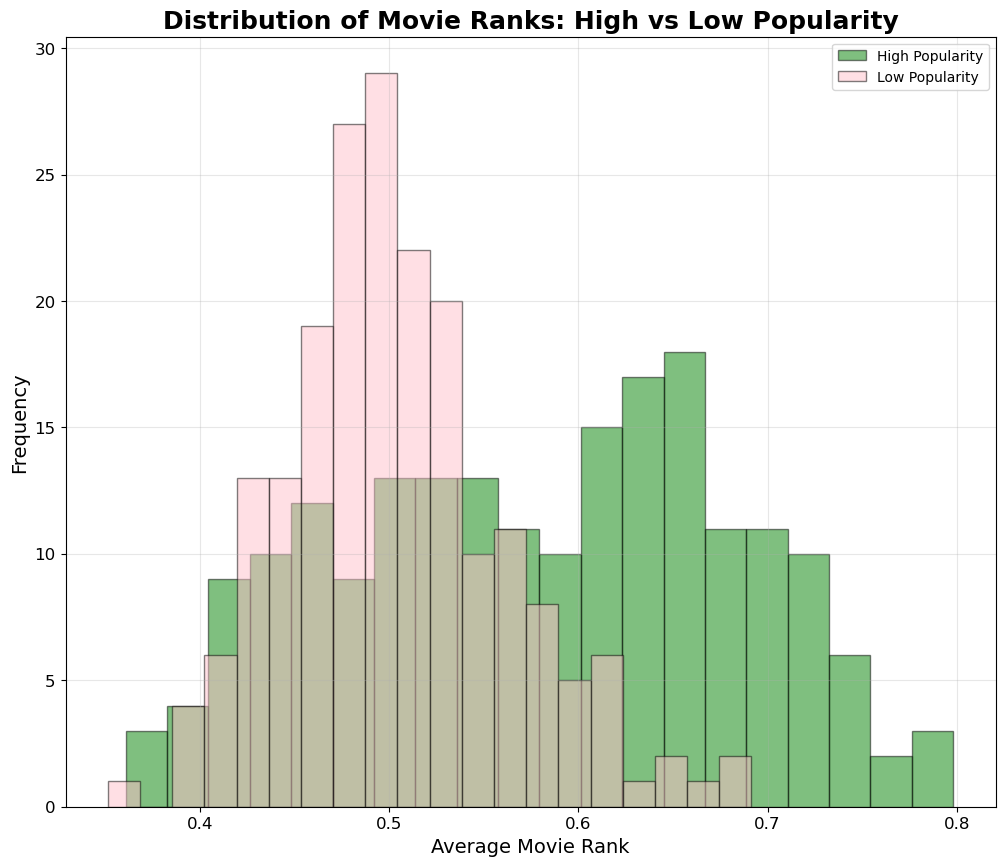

In [10]:
# figure size 
plt.figure(figsize=(12, 10))

# plot histograms
plt.hist(high_pop, alpha=0.5, label='High Popularity', bins=20, color='green', edgecolor = 'black')
plt.hist(low_pop, alpha=0.5, label='Low Popularity', bins=20, color='pink', edgecolor = 'black')

# aesthetics 
# xlabel
plt.xlabel('Average Movie Rank', fontsize=14)
# ylabel
plt.ylabel('Frequency', fontsize = 14)

# title
plt.title('Distribution of Movie Ranks: High vs Low Popularity', 
          fontweight = 'bold', 
          fontsize = 18)

# axes 
plt.tick_params(axis='both', labelsize=12)

# legend 
plt.legend()

# grid
plt.grid(True, alpha=0.3)

# show the plot
plt.show()

###  Mann-Whitney U test (one-sided)
`Rationale for the test:` We do not know population parameters such as the mean or standard deviation. Rating data is ordinal and does not satisfy normality assumptions. Parametric tests like the t-test are not appropriate. A non parametric Mann Whitney U test fits this setting. The test compares central tendency for two independent ordinal samples.

Hypotheses:

`Null hypothesis H0:` The median ratings of more popular movies equal the median ratings of less popular movies.

`Alternative hypothesis Ha:` The median rating of more popular movies are higher than the median ratings of less popular movies.

This is a one-sided test because the question asks whether one group ratings are higher. 

Significance level:
`α = 0.005`

`Interpretation of the p value:`
The p value represents the probability of observing the sample difference, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, the observed difference is unlikely under the null hypothesis. We reject H0 and conclude that more popular movies receive significantly higher median ratings.

If the p value is larger than 0.005, the observed difference is consistent with random variation. We fail to reject H0.

In [11]:
# apply mann-whitney u test
u_stat, p_mann = stats.mannwhitneyu(high_pop, low_pop, alternative='greater')

# print results
print(f"\nMann-Whitney U statistic: {u_stat}")
# significance function 
significance(0.005, p_mann)


Mann-Whitney U statistic: 28825.0
p = 1.14938e-14 < α = 0.005 = Reject H0 (statistically significant).


As the p value is < 0.005 we have sufficient evidence to conclude that we can reject the null hypothesis and conclude that movies that are more popular are rated higher (recieve higher rankings on a scale of 0-1). 

## Question 2 - Are movies that are newer rated differently than movies that are older? 

Here we used standardised rank transformations to eliminate 'psychological differences' in movie raters. The rank transform was standardised to a 0-1 scale with 1 being the movie which is rated highest by that user. We also do a median split on the movie release date to classify as 'Old' and 'New'.

In [12]:
# copy the data for question 2 to avoid changes 
q2_df = df.copy()

# save movie columns for later use
movie_columns = q2_df.columns[:400]

#median split on year
years, movie_titles = [], []

# extract years from movie titles
for col in movie_columns:
    try:
        year_str = col[-5:-1]
        year = int(year_str)
        if 1800 <= year <= 2030:
            years.append(year)
        else:
            years.append(None)
    except (ValueError, IndexError):
        years.append(None)
    movie_titles.append(col)
movie_info = pd.DataFrame({
    'title': movie_titles,
    'year': years,
    'column_name': movie_columns
}).dropna(subset=['year'])

# median split on year
median_year = movie_info['year'].median()

# assign age groups
movie_info['age_group'] = movie_info['year'].apply(lambda x: 'New' if x > median_year else 'Old')

# compute average standardized ranks for each movie
rating_data = q2_df[movie_info['column_name']]
ranked_data = rating_data.rank(axis=1, method='average', na_option='keep')
standardized_ranks = ranked_data.div(ranked_data.max(axis=1), axis=0)

# compute average standardized ranks for each movie
avg_standardized_rank = standardized_ranks.mean()

# combine into a summary DataFrame
movie_stats = pd.DataFrame({
    'movie': movie_info['title'].values,
    'year': movie_info['year'].values,
    'avg_standardized_rank': avg_standardized_rank.values,
    'age_group': movie_info['age_group'].values
})

# separate into two groups
old_movies = movie_stats[movie_stats['age_group'] == 'Old']['avg_standardized_rank'].dropna()
new_movies = movie_stats[movie_stats['age_group'] == 'New']['avg_standardized_rank'].dropna()


Now we plot the distribution of standardised movie ranks for new and old movies.

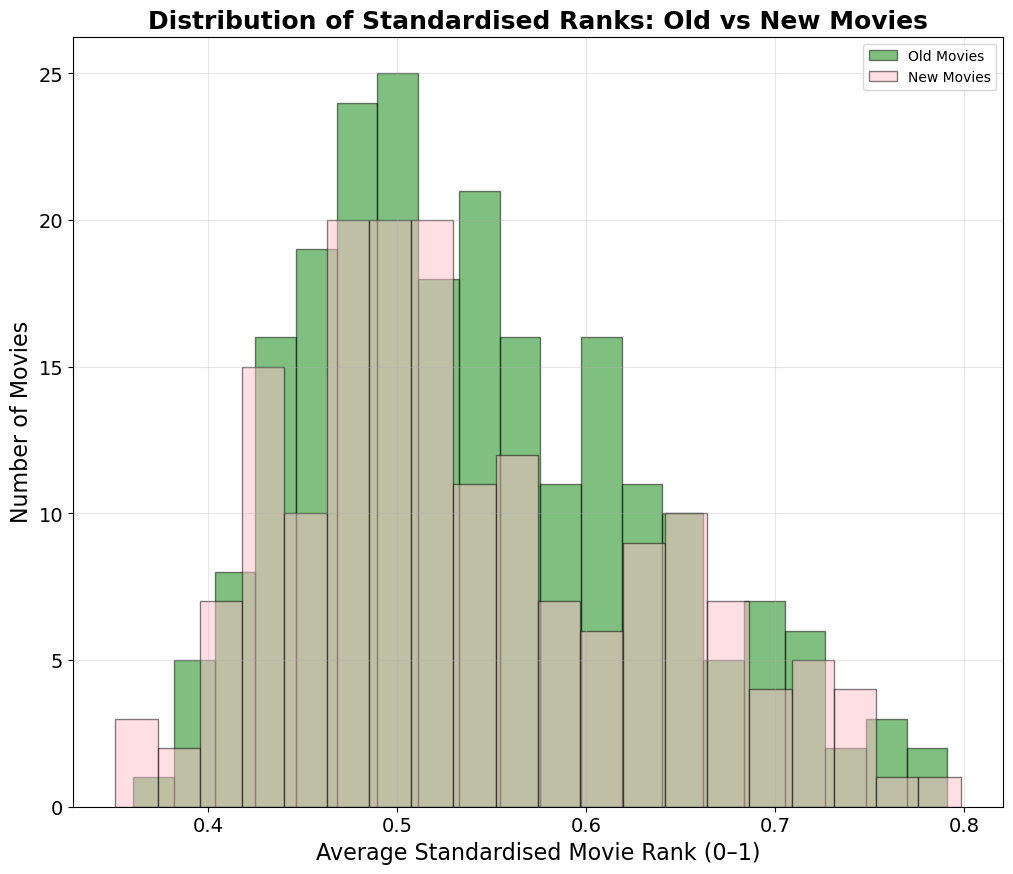

In [13]:
# figure size 
plt.figure(figsize=(12,10))

# plot histograms 
plt.hist(old_movies, alpha=0.5, label='Old Movies', bins=20, color='green', edgecolor='black')
plt.hist(new_movies, alpha=0.5, label='New Movies', bins=20, color='pink', edgecolor='black')

# aesthetics
# xlabel
plt.xlabel('Average Standardised Movie Rank (0–1)', 
           fontsize = 16)
# ylabel
plt.ylabel('Number of Movies', 
           fontsize = 16)

# title
plt.title('Distribution of Standardised Ranks: Old vs New Movies',
          fontweight = 'bold', 
          fontsize = 18)

# axes
plt.tick_params(axis='both', labelsize=14)

# legend
plt.legend()

# show the grid and plot
plt.grid(alpha=0.3)
plt.show()

### Mann-Whitney U test (two-sided)
`Rationale for the test:` We do not know population parameters such as the mean or standard deviation. Rating data is ordinal and does not satisfy normality assumptions. Parametric tests are not appropriate. A non parametric Mann Whitney U test is suitable for comparing two independent groups of ordinal ratings. The test evaluates whether the central tendency differs between newer and older movies.

Hypotheses:

`Null hypothesis H0:` The median ratings of newer movies equal the median ratings of older movies.

`Alternative hypothesis Ha:` The median ratings of newer movies differ from the median ratings of older movies.

This is a two sided test because the question asks whether ratings are different, not whether one group is higher.

Significance level:`α = 0.005`

`Interpretation of the p value:`
The p value represents the probability of observing the sample difference, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, the observed difference is unlikely under the null hypothesis. We reject H0 and conclude that newer and older movies receive significantly different median ratings.

If the p value is larger than 0.005, the observed difference is consistent with random variation. We fail to reject H0.

In [14]:
# apply the mann-whitney u test
u_stat, u_p = stats.mannwhitneyu(old_movies, new_movies, alternative='two-sided')

# print results 
print(f"\nMann-Whitney U statistic (standardised ranks): {u_stat:.4f}")
# apply significance function 
significance(0.005, u_p)


Mann-Whitney U statistic (standardised ranks): 20283.0000
p = 0.588307 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


As the p-value is much greater than 0.005 we have no evidence to show that new and old movies are ranked and therefore rated differently than each other. We fail to reject the null hypothesis and we conclude that the observed difference is consistent with random variation. 

## Q3 - Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 

In [15]:
# copy the data for question 3 to avoid changes
q3_df = df.copy()

Let's plot gender distribution. 

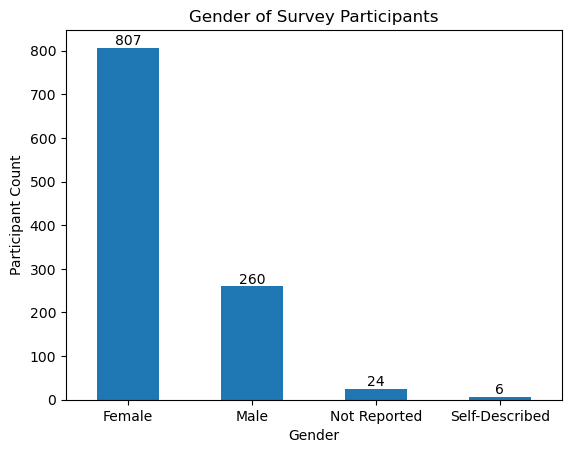

In [16]:
# plot counts of participant genders
gender_col_name = q3_df.columns[474]  # get gender column in dataframe
# Plot counts
x_values = ["Female", "Male", "Not Reported", "Self-Described"]  # X labels
y_values = q3_df[gender_col_name].value_counts(dropna = False)  # Y values - do not drop na values. 
# Instead these will be plotted as "Not Reported"


# plot 
bar_plot(
    x_values,
    y_values,
    title="Gender of Survey Participants",
    xlabel="Gender",
    ylabel="Participant Count"
)

Now let's plot distribution of ratings by males and females.

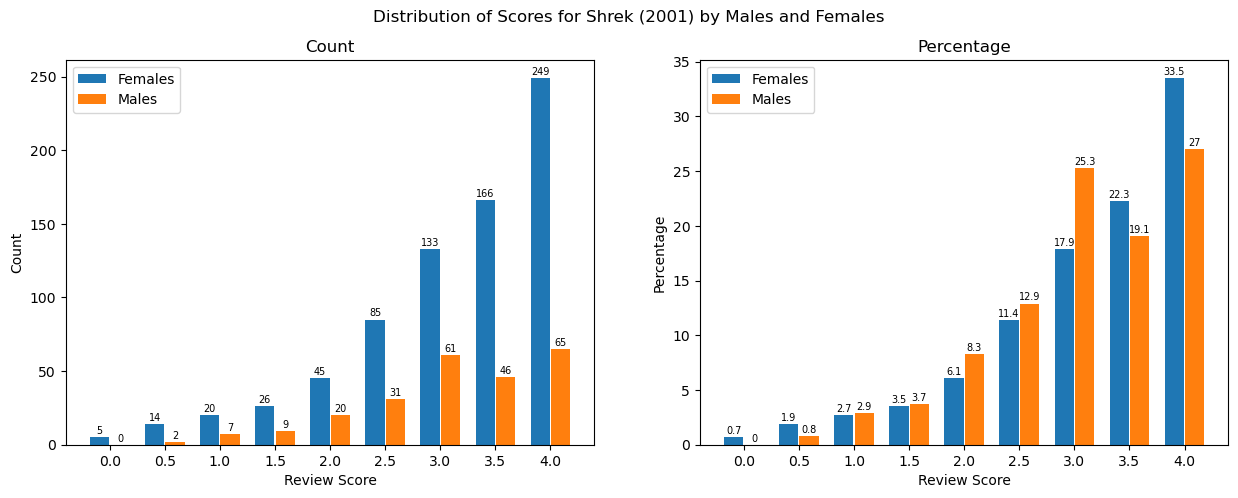

In [17]:
shrek_col_name = "shrek (2001)"  # Column name for shrek movies
shrek_reviews_female = q3_df[shrek_col_name].loc[q3_df[gender_col_name] == 1]  # Split into male reviews
shrek_reviews_male = q3_df[shrek_col_name].loc[q3_df[gender_col_name] == 2]  # Split into female reviews

# Plot distributions
distribution_plots(
        sample_a=shrek_reviews_female, 
        sample_b=shrek_reviews_male,
        sample_a_label="Females",
        sample_b_label="Males",
        title="Distribution of Scores for Shrek (2001) by Males and Females",
        x_axis_label="Review Score",
        figsize=(15,5),
        gap=0.02
)

### Mann-Whitney U Test (two-sided) + KS Test (two-sided)

`Rationale for tests:` For this question, we examine whether male and female viewers rate Shrek (2001) differently. Rating data is ordinal and does not satisfy normality assumptions. Population parameters are unknown. Parametric tests are not appropriate.

We therefore apply two non parametric tests, each serving a different purpose.

First, we use the Mann Whitney U test. This test compares the central tendency of two independent groups. It evaluates whether the median rating differs between male and female viewers. This result is useful from a business perspective, since differences in median ratings reflect differences in typical user experience and overall satisfaction.

Second, we use the Kolmogorov Smirnov test. This test compares the entire distributions of ratings, not only their medians. It detects differences in shape, spread, or skewness. For example, two groups may have similar medians but different variability. Since the research question asks whether ratings differ in any way, the KS test directly answers the question and is therefore the primary result reported in the paper.

#### Mann-Whitney U Test (two-sided)
Hypotheses: 

`Null hypothesis H0:` The median ratings of Shrek (2001) are equal for male and female viewers.

`Alternative hypothesis Ha:` The median ratings of Shrek (2001) differ between male and female viewers.

This is a two sided test because the question asks whether ratings differ, not whether one group is higher.

Significance level: `α = 0.005`

`Interpretation of the p value:` The p value represents the probability of observing the sample difference, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, the observed difference is unlikely under the null hypothesis. We reject H0 and conclude that the median rating of Shrek (2001) differs between male and female viewers.

If the p value is larger than 0.005, the observed difference is consistent with random variation. We fail to reject H0.



In [32]:
# conduct the significance test 
U1, p = stats.mannwhitneyu(shrek_reviews_female.dropna(), 
                           shrek_reviews_male.dropna(), 
                           alternative='two-sided')
# apply significance function 
print(f"\nMann-Whitney U statistic for Shrek (2001) reviews: {U1}")
significance(0.005, p)


Mann-Whitney U statistic for Shrek (2001) reviews: 96830.5
p = 0.0505366 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


The Mann Whitney U statistic is 96830.5 with a p value of 0.0505366. The p value exceeds the significance level α = 0.005.

We fail to reject the null hypothesis. There is no statistically significant evidence that the median rating of Shrek (2001) differs between male and female viewers.

This result suggests that typical enjoyment of Shrek (2001), as measured by median ratings, does not differ by gender.

#### KS Test (two-sided)


Hypotheses

`Null hypothesis H0:` The distribution of Shrek (2001) ratings is the same for male and female viewers.

`Alternative hypothesis Ha:` The distribution of Shrek (2001) ratings differs between male and female viewers.

This is a two sided test because the question asks whether the distributions differ in any way, not in a specific direction.

Significance level: `α = 0.005`

`Interpretation of the p value:` The p value represents the probability of observing the maximum difference between the two empirical cumulative distribution functions, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, we reject H0 and conclude that male and female viewers have significantly different rating distributions for Shrek (2001).

If the p value is larger than 0.005, we fail to reject H0 and conclude that the observed difference in distributions is consistent with random variation.

In [33]:
# apply the test
k_statistic, p_value = stats.kstest(shrek_reviews_female.dropna(), shrek_reviews_male.dropna(), 
                                    alternative = 'two-sided')
print(f"Kolmogorov-Smirnov statistic: {k_statistic}")

# apply significance function
significance(0.005, p_value)

Kolmogorov-Smirnov statistic: 0.09796552051512596
p = 0.056082 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


The Kolmogorov Smirnov statistic is 0.09797 with a p value of 0.056082. The p value exceeds the significance level α = 0.005.

We fail to reject the null hypothesis. There is no statistically significant evidence that the rating distributions of Shrek (2001) differ between male and female viewers.

Combined with the Mann Whitney U test result, this suggests that enjoyment of Shrek (2001) is not gendered. Neither the typical rating nor the overall distribution of ratings shows a statistically significant difference between male and female viewers.

## Q4 - What proportion of movies are rated differently by male and female viewers?

In [35]:
# copy the data for question 4 to avoid changes 
q4_df = df.copy()

# mask for movie columns 
movie_columns = q4_df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [36]:
# check the gender identity column we need
gender_identity = q4_df.iloc[:, 474]
gender_identity.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: gender identity (1 = female; 2 = male; 3 = self-described), dtype: float64

### Mann-Whitney U (two-sided) Test + KS (two-sided) Test
`Rationale for tests:` For this question, we are trying proportion of movies rated differently by males and females. Rating data is ordinal and does not satisfy normality assumptions. Population parameters are unknown. Parametric tests are not appropriate.

We therefore apply two non parametric tests, each serving a different purpose.

First, we use the Mann Whitney U test. This test compares the central tendency of two independent groups. It evaluates whether the median rating differs between male and female viewers. This result is useful from a business perspective, since differences in median ratings reflect differences in typical user experience and overall satisfaction.

Second, we use the Kolmogorov Smirnov test. This test compares the entire distributions of ratings, not only their medians. It detects differences in shape, spread, or skewness. For example, two groups may have similar medians but different variability. Since the research question asks whether ratings differ in any way, the KS test directly answers the question and is therefore the primary result reported in the paper.

#### Mann-Whitney U Test (two-sided)


Hypotheses for each movie

`Null hypothesis H0:` The median rating of the movie is equal for male and female viewers.

`Alternative hypothesis Ha:` The median rating of the movie differs between male and female viewers.

This is a two sided test because the question asks whether ratings differ, not whether one group rates higher.

`Interpretation:`
For each movie, if the p value is smaller than 0.005, we reject H0 and conclude that male and female viewers rate the movie differently in terms of median enjoyment. If the p value is larger than 0.005, we fail to reject H0.

The final result is reported as the proportion of movies for which H0 is rejected. This proportion represents the share of movies whose typical ratings differ by gender.

In [37]:
# significance level
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_gender_mann = []
results_q4_mann = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = q4_df.loc[q4_df[gender_identity.name] == 1, movie].dropna()
    males = q4_df.loc[q4_df[gender_identity.name] == 2, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(females, males, alternative='two-sided')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender_mann.append(movie)

        # save data as well
        results_q4_mann.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "U": u_statistic,
        "p_value": p_value,
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_gender_mann) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_gender_mann)}")
# # list of movies 
# for i in significant_movies_gender_mann:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:12.5%
Number of movies with significant results:50


Only 12.5% (50 movies) showed a significant difference in median ratings between female and male viewers. 

In [38]:
# convert results to dataframe
df_results_q4_mann = pd.DataFrame(results_q4_mann).copy()

# compare and sort values from increasing to decreasing p-value
df_results_q4_mann.sort_values(by = ["p_value"], 
                       ascending= False)





,movie,n_female,n_male,U,p_value
22,room (2015),239,56,8245.5,4.408124e-03
5,the lost world: jurassic park (1997),392,157,26028.5,4.065866e-03
13,elf (2003),596,174,59174.0,3.619478e-03
2,fargo (1996),149,94,5461.5,3.309364e-03
44,iron man 3 (2013),391,184,41353.5,3.172237e-03
27,die hard (1988),169,119,8025.0,3.061176e-03
11,funny girl (1968),106,29,2091.5,2.622892e-03
20,can't hardly wait (1998),69,26,1258.5,2.335726e-03
31,knight and day (2010),140,54,4838.0,2.200775e-03
32,the holiday (2006),229,36,5417.0,2.102445e-03


#### KS Test (two-sided)

Hypotheses for each movie

`Null hypothesis H0:` The distribution of ratings for the movie is the same for male and female viewers.

`Alternative hypothesis Ha:` The distribution of ratings for the movie differs between male and female viewers.

This is a two sided test because the question asks whether ratings differ in any way, not whether one group rates higher.

`Interpretation:`
For each movie, if the p value is smaller than 0.005, we reject H0 and conclude that male and female viewers rate the movie differently in terms of the full rating distribution. If the p value is larger than 0.005, we fail to reject H0.

The final result is reported as the proportion of movies for which H0 is rejected. This proportion represents the share of movies whose rating distributions differ by gender.

In [39]:
# significance level
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_gender_ks = []
results_q4_ks = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = q4_df.loc[q4_df[gender_identity.name] == 1, movie].dropna()
    males = q4_df.loc[q4_df[gender_identity.name] == 2, movie].dropna()

    # conducting the test 
    d_statistic, p_value = stats.kstest(females, males, alternative='two-sided')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender_ks.append(movie)

        # save data as well
        results_q4_ks.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "D": d_statistic,
        "p_value": p_value,
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_gender_ks) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_gender_ks)}")
# # list of movies 
# for i in significant_movies_gender_ks:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:6.25%
Number of movies with significant results:25


Only 6.25% (25 movies) showed a significant difference in rating distribution between female and male viewers. 


In [40]:
# convert results to dataframe
df_results_q4_ks = pd.DataFrame(results_q4_ks).copy()

# compare and sort values from increasing to decreasing p-value
df_results_q4_ks.sort_values(by = ["p_value"], 
                       ascending= False)


,movie,n_female,n_male,D,p_value
20,aladdin (1992),625,176,0.147845,0.004330
5,divine secrets of the ya-ya sisterhood (2002),55,26,0.403497,0.004219
17,chicago (2002),196,41,0.304754,0.002720
10,10 things i hate about you (1999),481,57,0.250210,0.002673
11,uptown girls (2003),217,25,0.375668,0.002415
2,the exorcist (1973),303,110,0.203960,0.001998
8,my big fat greek wedding (2002),399,99,0.210830,0.001411
1,13 going on 30 (2004),565,79,0.230380,0.001016
3,pirates of the caribbean: dead man's chest (2006),587,207,0.155947,0.001009
22,gladiator (2000),174,123,0.238155,0.000437


### Extra Credit - Analyzing effect size between female and male viewers 

We now want to understand how powerful the effect of gender is on movie enjoyment beyond simple p-values. 

To do that, we compute effect sizes. Because our ratings are ordinal, we do not use parametric effect sizes like Cohen's D or Hedges G, 
as these assume normality and equal variance of the data. 

To compute effect size for our movie rating, we had to find a non-parametric alternative of Cohen's d that will be as interpretable and practical. 

We found a peer-reviewed scientific paper published by [Kane Meissel and Esther S. Yao from University of Aucklannd](https://github.com/NBeibarys/Project-Hypothesis-Testing-of-MovieRatings-Using-Python/blob/main/project_guidelines/Using%20Cliff%E2%80%99s%20Delta%20as%20a%20Non-Parametric%20Effect%20Size%20Measure.pdf) in 2024, 
which proposes a non-parametric measure of effect size suitable for ordinal data. 

This measure is `Cliff's Delta (δ)`: 
- Obtained by calculating the non-overlapping area of two distributions at the individual case level. 
- Ranges from -1 to +1: extremes indicating no overlap between the distributions and 0 indicating complete overlap. 
- Cliff's delta measures the magnitude of an effect across the entire distributions of both groups. 

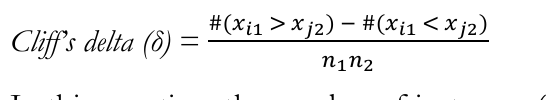
- number of instances where values (ratings in our case) from group 1 are larger than group 2 is substracted by number of instances where values in group 1 are smaller than group 2. 
- The difference is then divided by the product of both sample sizes. 
- Cliff's delta compares all possible combinations of values across distributions. 

`Cliff's Delta (δ) Interpretation:`
- Always compare the magnitudes in a reference to a group that is tested, not values of (δ):
- These thresholds are not our and proposed by the paper:
- |δ| < 0.15 (less than 15% non-overlap between groups 1 and 2) = negligible effect
- 0.15 <= |δ| < 0.33 = small effect 
- 0.33 <= |δ| < 0.47 = medium effect
- |δ| >= 0.47 =  large effect
- For example, δ of -0.47 when females are the reference group, this means that in 47% more pairwise comparisons, male ratings are higher than female ratings.

To avoid p hacking and redundant testing, we reuse the same per movie testing loop and apply a two sided Mann Whitney U test for each movie. This test focuses on differences in central tendency between male and female viewers. From a business perspective, differences in median ratings reflect differences in typical user experience and overall satisfaction, which are more actionable than differences in distribution shape alone.

For movies flagged as statistically significant, we additionally compute Cliff’s delta to quantify the practical magnitude and direction of the difference. The Mann Whitney U test identifies whether typical enjoyment differs by gender. Cliff’s delta then measures how large that difference is and which group tends to rate the movie higher.

This combined approach separates statistical significance from practical relevance and keeps the analysis focused on interpretable, decision oriented outcomes.



In [41]:
# list for movies that have potential significant results. 
significant_movies_gender = []
results_q4_mann = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = q4_df.loc[q4_df[gender_identity.name] == 1, movie].dropna()
    males = q4_df.loc[q4_df[gender_identity.name] == 2, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(females, males, alternative='two-sided')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender.append(movie)
        
        # computing cliff's delta now 
        effect, label = cliffs_delta.cliffs_delta(females, males)

        # save data as well
        results_q4_mann.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "U": u_statistic,
        "p_value": p_value,
        "delta": effect, 
        "Effect level": label
    })

Overall table:

In [42]:
# convert results to dataframe
df_results_q4_cliff = pd.DataFrame(results_q4_mann).copy()

# removing negligible effects delta < 0.15 
df_results_q4_cliff = df_results_q4_cliff.loc[df_results_q4_cliff["Effect level"]!="negligible"]

# How many were removed due to negligible effect?
print(f"Number of movies with non-negligible effects: {len(df_results_q4_mann) - len(df_results_q4_cliff)}")





Number of movies with non-negligible effects: 2


Table with female effect sizes

In [43]:
# table for female effects 
df_results_q4_cliff_female = df_results_q4_cliff.copy()

# filter mask
females = df_results_q4_cliff_female["delta"]>0

# data 
df_results_q4_cliff_female = df_results_q4_cliff_female.loc[females]

df_results_q4_cliff_female.sort_values(by = ["delta"], 
                                      ascending= False)

,movie,n_female,n_male,U,p_value,delta,Effect level
17,divine secrets of the ya-ya sisterhood (2002),55,26,1052.5,5.835228e-04,0.472028,medium
14,andaz apna apna (1994),50,23,844.0,1.264299e-03,0.467826,medium
26,the firm (1993),48,26,909.0,1.132727e-03,0.456731,medium
29,uptown girls (2003),217,25,3848.5,4.978236e-04,0.418802,medium
20,can't hardly wait (1998),69,26,1258.5,2.335726e-03,0.403010,medium
11,funny girl (1968),106,29,2091.5,2.622892e-03,0.360768,medium
16,girl interrupted (1999),195,28,3710.5,1.648810e-03,0.359158,medium
15,the proposal (2009),519,79,27821.5,1.602214e-07,0.357113,medium
38,chicago (2002),196,41,5414.0,3.694106e-04,0.347437,medium
41,bend it like beckham (2002),294,78,15340.0,3.207870e-06,0.337868,medium


Table with male effect sizes:

In [44]:
# table for female effects 
df_results_q4_cliff_male = df_results_q4_cliff.copy()

# filter mask
males = df_results_q4_cliff_male["delta"]<0

# data 
df_results_q4_cliff_male = df_results_q4_cliff_male.loc[males]

df_results_q4_cliff_male.sort_values(by = ["delta"], 
                                      ascending= False)

,movie,n_female,n_male,U,p_value,delta,Effect level
5,the lost world: jurassic park (1997),392,157,26028.5,0.004066,-0.154150,small
45,inception (2010),513,197,42413.0,0.000561,-0.160646,small
3,star wars: episode iv - a new hope (1977),343,185,26577.0,0.001666,-0.162336,small
7,inglorious bastards (2009),266,155,16914.0,0.001623,-0.179529,small
48,jaws (1975),353,138,19755.5,0.000973,-0.188919,small
27,die hard (1988),169,119,8025.0,0.003061,-0.201929,small
36,8 mile (2002),205,119,9723.0,0.001897,-0.202869,small
4,indiana jones and the raiders of the lost ark ...,194,135,10432.5,0.001388,-0.203322,small
0,django unchained (2012),269,167,17761.0,0.000155,-0.209269,small
9,the exorcist (1973),303,110,12997.0,0.000554,-0.220102,small


`Key points:`
- Only a small share of movies show gender differences.
- Most effects are small. A few are medium.
- Direction matches genre.

`Female viewers rate higher:`
- Romance, rom coms, relationship driven stories, female led films.
- Examples: The Proposal, 13 Going on 30, The Holiday, Girl Interrupted.

`Male viewers rate higher:`
- Action, war, sci fi, crime.
- Examples: The Matrix, Gladiator, Saving Private Ryan, Alien.

`Business importance:`
- Use the signal only for movies with medium Cliff's delta.
- Recommend romance and relationship-driven films more often to female viewers and action, war, and sci-fi-driven films more often to male viewers. 





## Q5 - Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

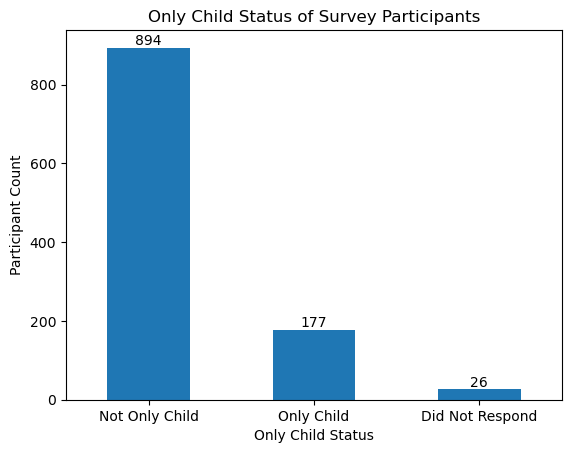

In [45]:
# copy the data for question 5 to avoid changes 
q5_df = df.copy()

# Plot counts of participant genders
only_child_col_name = q5_df.columns[475]  # Get gender column in dataframe
x_values = ["Not Only Child", "Only Child", "Did Not Respond"]  # X labels
y_values = q5_df[only_child_col_name].value_counts(dropna = False)  # Y values - do not drop na values. Instead these will be plotted as "Not Reported"

bar_plot(
    x_values,
    y_values,
    title="Only Child Status of Survey Participants",
    xlabel="Only Child Status",
    ylabel="Participant Count"
)

Now let's plot distribution of ratings by "only child status".

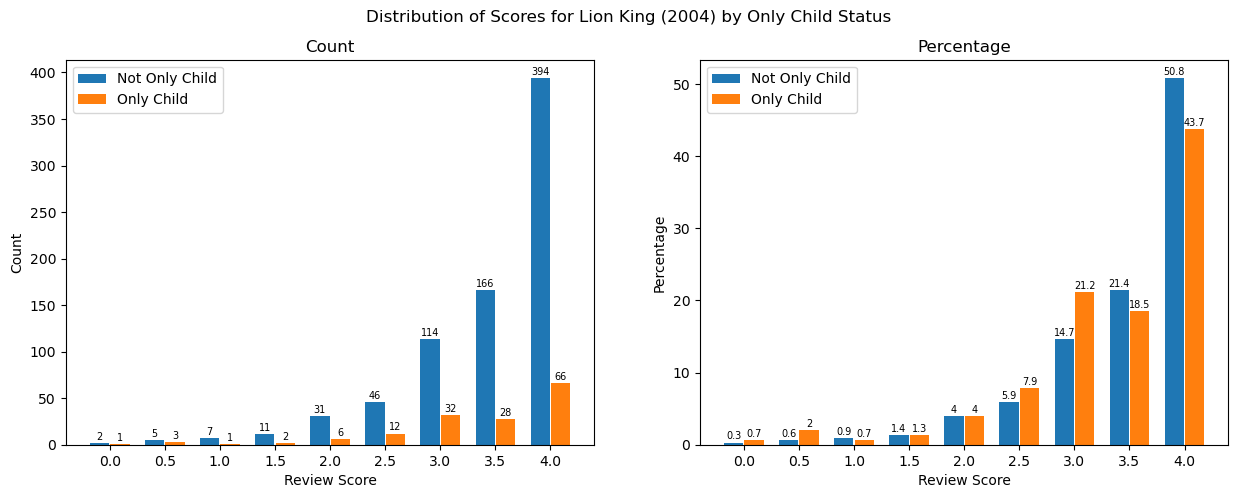

In [46]:
lion_king_col_name = "the lion king (1994)"  # Column name for shrek movies
lion_king_reviews_not_only_child = q5_df[lion_king_col_name].loc[q5_df[only_child_col_name] == 0]  # Split into not only child reviews
lion_king_reviews_only_child = q5_df[lion_king_col_name].loc[q5_df[only_child_col_name] == 1]  # Split into only child reviews

# Plot distributions
distribution_plots(
        sample_a=lion_king_reviews_not_only_child, 
        sample_b=lion_king_reviews_only_child,
        sample_a_label="Not Only Child",
        sample_b_label="Only Child",
        title="Distribution of Scores for Lion King (2004) by Only Child Status",
        x_axis_label="Review Score",
        figsize=(15, 5),
        gap=0.02
)

### Mann-Whitney U Test (one-sided)


`Rationale for the test:`

We do not know population parameters such as the mean or standard deviation. Rating data is ordinal and does not satisfy normality assumptions. Parametric tests are not appropriate. We compare two independent groups: viewers who are only children and viewers with siblings. A non parametric Mann Whitney U test is suitable for testing differences in typical enjoyment.

Hypotheses:

`Null hypothesis H0:` The median rating of The Lion King (1994) of viewers without siblings is equal to the median rating of viewers with siblings. 

`Alternative hypothesis Ha:` The median rating of The Lion King (1994) is higher for viewers who are only children than for viewers with siblings.

This is a one sided test because the question asks whether only children enjoy the movie more.

Significance level: `α = 0.005`

Interpretation of the p value

The p value represents the probability of observing the sample difference, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, we reject H0 and conclude that only children enjoy The Lion King (1994) more than viewers with siblings.
If the p value is larger than 0.005, we fail to reject H0 and conclude that the observed difference is consistent with random variation.

In [47]:
# apply the significance test
U1, p = stats.mannwhitneyu(lion_king_reviews_only_child.dropna(), 
                           lion_king_reviews_not_only_child.dropna(), 
                           alternative="greater")
# print the U statistic 
print(f"\nMann-Whitney U statistic for Lion King (1994) reviews: {U1}")
# apply the significance function
significance(0.005, p)



Mann-Whitney U statistic for Lion King (1994) reviews: 52929.0
p = 0.978419 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


The Mann Whitney U statistic is 52929.0 with a p value of 0.978419, which is far greater than the significance level α = 0.005.

We fail to reject the null hypothesis. There is no statistically significant evidence that viewers who are only children enjoy The Lion King (1994) more than viewers with siblings.

This suggests that enjoyment of The Lion King (1994) does not differ by only child status.

## Q6 - What proportion of movies exhibit an “only child effect”, i.e. are rated differently by viewers with siblings vs. those without?  

In [48]:
# copy the data for question 6
q6_df = df.copy()


# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [49]:
# checking the needed column 
n_child = df.iloc[:, 475]
n_child.value_counts()


are you an only child? (1: yes; 0: no; -1: did not respond)
 0    894
 1    177
-1     26
Name: count, dtype: int64

### Mann-Whitney U (two-sided) Test + KS (two-sided) Test
`Rationale for tests:` For this question, we are trying proportion of movies rated differently by viewers with and without siblings. Rating data is ordinal and does not satisfy normality assumptions. Population parameters are unknown. Parametric tests are not appropriate.

We therefore apply two non parametric tests, each serving a different purpose.

First, we use the Mann Whitney U test. This test compares the central tendency of two independent groups. It evaluates whether the median rating differs viewers with and without siblings. This result is useful from a business perspective, since differences in median ratings reflect differences in typical user experience and overall satisfaction.

Second, we use the Kolmogorov Smirnov test. This test compares the entire distributions of ratings, not only their medians. It detects differences in shape, spread, or skewness. For example, two groups may have similar medians but different variability. Since the research question asks whether ratings differ in any way, the KS test directly answers the question and is therefore the primary result reported in the paper.

#### Mann-Whitney U Test (two-sided)


Hypotheses for each movie

`Null hypothesis H0:` The median rating of the movie is equal for viewers with and without siblings. 

`Alternative hypothesis Ha:` The median rating of the movie differs between viewers with and without siblings. 

This is a two sided test because the question asks whether ratings differ, not whether one group rates higher.

`Interpretation:`
For each movie, if the p value is smaller than 0.005, we reject H0 and conclude that viewers that have siblings and those that do not rate the movie differently in terms of median enjoyment. If the p value is larger than 0.005, we fail to reject H0.

The final result is reported as the proportion of movies for which H0 is rejected. This proportion represents the share of movies whose typical ratings differ by "only child effect".

In [50]:
# significance level
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_child_mann = []
results_q6_mann = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    only_child = q6_df.loc[q6_df[n_child.name] == 1, movie].dropna()
    not_only_child = q6_df.loc[q6_df[n_child.name] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, not_only_child, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_child_mann.append(movie)

        # save data as well
        results_q6_mann.append({
        "movie": movie,
        "n_only_child": len(only_child),
        "n_not_only_child": len(not_only_child),
        "U": u_statistic,
        "p_value": p_value
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{round(( len(significant_movies_child_mann) / len(movie_columns) ) * 100, 2)}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_child_mann)}")
# # list of movies 
# for i in significant_movies_child_mann:
#     print(f"\n{i}\n")

Proportion of movies that had significant results:1.75%
Number of movies with significant results:7


Only 1.75% - 7 movies showed significant difference in population distributions of viewers movie ratings without and with siblings. 

In [51]:
# convert results to dataframe
df_results_q6_mann = pd.DataFrame(results_q6_mann).copy()

# compare and sort values from decreasing to increasing on p-value
df_results_q6_mann.sort_values(by = ["p_value"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value
5,feardotcom (2002),12,44,123.0,0.004604
3,american pie (1999),75,367,10903.0,0.004168
6,captain america: civil war (2016),104,431,18403.5,0.003736
4,star wars: episode vi - the return of the jedi...,72,378,10705.0,0.003346
1,the blue lagoon (1980),28,135,1200.5,0.002135
2,happy gilmore (1996),36,266,3196.5,0.001075
0,billy madison (1995),43,224,3226.5,0.000538


#### KS Test (two-sided)

Hypotheses for each movie

`Null hypothesis H0:` The distribution of ratings for the movie is the same for viewers with and without siblings. 

`Alternative hypothesis Ha:` The distribution of ratings for the movie differs between viewers with and without siblings.

This is a two sided test because the question asks whether ratings differ in any way, not whether one group rates higher.

`Interpretation:`
For each movie, if the p value is smaller than 0.005, we reject H0 and conclude that viewers with and without siblings rate the movie differently in terms of the full rating distribution. If the p value is larger than 0.005, we fail to reject H0.

The final result is reported as the proportion of movies for which H0 is rejected. This proportion represents the share of movies whose rating distributions differ by "single child effect".

In [52]:
# significance level
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_child_ks = []
results_q6_ks = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    only_child = q6_df.loc[q6_df[n_child.name] == 1, movie].dropna()
    not_only_child = q6_df.loc[q6_df[n_child.name] == 0, movie].dropna()

    # conducting the test 
    d_statistic, p_value = stats.kstest(only_child, not_only_child, alternative='two-sided')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_child_ks.append(movie)

        # save data as well
        results_q6_ks.append({
        "movie": movie,
        "n_only_child": len(only_child),
        "n_not_only_child": len(not_only_child),
        "D": d_statistic,
        "p_value": p_value,
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_child_ks) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_child_ks)}")
# # list of movies 
# for i in significant_movies_child_ks:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:0.75%
Number of movies with significant results:3


Only 0.75% (3 movies) showed a significant difference in rating distribution between viewers with and without siblings.


In [53]:
# convert results to dataframe
df_results_q6_ks = pd.DataFrame(results_q6_ks).copy()

# compare and sort values from increasing to decreasing p-value
df_results_q6_ks.sort_values(by = ["p_value"], 
                       ascending= False)

,movie,n_only_child,n_not_only_child,D,p_value
0,billy madison (1995),43,224,0.287687,0.003872
2,toy story (1995),144,772,0.164148,0.002496
1,happy gilmore (1996),36,266,0.334378,0.001159


### Extra Credit - Analyzing effect size between viewers who have and do not have siblings

As in Question 4, we compute Cliff's delta to quantify the practical magnitude of the effect beyond statistical significance. Since movie ratings are ordinal, we do not use parametric effect sizes such as Cohen’s d. Instead, we reuse the same non parametric effect size approach introduced in Question 4.

We base this analysis on the Mann Whitney U test results rather than the KS test because our goal is to understand differences in typical enjoyment. The Mann Whitney U test focuses on differences in central tendency, which is more relevant from a business perspective than differences in distribution shape alone.

To avoid p hacking and redundant testing, we reuse the same per movie loop and compute Cliff's delta only for movies flagged as statistically significant by the Mann Whitney U test. The test identifies whether a meaningful difference in typical ratings exists, while Cliff's delta quantifies how large that difference is and in which direction.

In [54]:
# list for movies that have potential significant results. 
significant_movies_child = []
results_q6_mann = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    only_child = q6_df.loc[q6_df[n_child.name] == 1, movie].dropna()
    not_only_child = q6_df.loc[q6_df[n_child.name] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, not_only_child, alternative='two-sided')

    # if condition to save significant movies to the list created:  
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_child.append(movie)

        # calculate cliff's delta 
        delta, level = cliffs_delta.cliffs_delta(only_child, 
                                                 not_only_child)
        
        # save data as well
        results_q6_mann.append({
        "movie": movie,
        "n_only_child": len(only_child),
        "n_not_only_child": len(not_only_child),
        "U": u_statistic,
        "p_value": p_value, 
        "delta": delta, 
        "level":level
    })

In [55]:
# convert results to dataframe
df_results_q6_cliff = pd.DataFrame(results_q6_mann).copy()

# table with all effects sorted in descenging order by delta
# except we need to filter out negligible effects 
negligible_mask = df_results_q6_cliff["level"] != "negligible"
df_results_q6_cliff = df_results_q6_cliff.loc[negligible_mask]

df_results_q6_cliff.sort_values(by = ["delta"], 
                       ascending= False)



,movie,n_only_child,n_not_only_child,U,p_value,delta,level
6,captain america: civil war (2016),104,431,18403.5,0.003736,-0.178855,small
3,american pie (1999),75,367,10903.0,0.004168,-0.207775,small
4,star wars: episode vi - the return of the jedi...,72,378,10705.0,0.003346,-0.213330,small
0,billy madison (1995),43,224,3226.5,0.000538,-0.330046,medium
2,happy gilmore (1996),36,266,3196.5,0.001075,-0.332393,medium
1,the blue lagoon (1980),28,135,1200.5,0.002135,-0.364815,medium
5,feardotcom (2002),12,44,123.0,0.004604,-0.534091,large


`Key points:`
- Only a small number of movies show differences by only child status.
- Most effects are small to medium. One large effect appears.
- All effects are negative, indicating higher ratings from viewers who are not only children.

`Movies rated higher by viewers with siblings:`
- Comedy and teen comedy: Billy Madison, Happy Gilmore, American Pie
- Adventure and franchise films: Star Wars Episode VI, Captain America Civil War
- Niche or cult titles: The Blue Lagoon, Feardotcom

`Interpretation:` Viewers who grew up with siblings tend to rate these movies higher than only children. The effect is usually modest, but consistent across several titles. The large effect observed for Feardotcom should be interpreted cautiously due to the small sample size of only child viewers.

`Business importance:`
- Use the signal only for movies with medium or large Cliff’s delta.
- Slightly favor these movies for users who report having siblings when recommendations are otherwise similar.

## Q7 - Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone? 

In [56]:
# copy the data for q7 to avoid changes
q7_df = df.copy()

# taking filter mask for necessary columns
columns = ["the wolf of wall street (2013)", 
           "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"]

# subset with 2 columns: 
wolf_df = q7_df.loc[:, columns].copy()

# first 5 rows of the subset
wolf_df

,the wolf of wall street (2013),movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)
0,NaN,1
1,NaN,0
2,NaN,0
3,4.0,1
4,3.0,1
...,...,...
1092,NaN,0
1093,3.5,0
1094,2.0,0
1095,NaN,1


Since we now successfully created subset of the data for question, 
we can divide the data into two series groups: 

After separating, we remove null values in each group separately. 

1) Social watchers 
2) Alone watchers 

In [57]:
# mask columns for filtering
flag_col  = columns[1] # movies are best enjoyed alone column
movie_col = columns[0] # the wolf of wall street movie column

mask_social = wolf_df[flag_col].eq(0)
mask_alone  = wolf_df[flag_col].eq(1)

# separating into two groups and droppnig null values 
social_watchers = wolf_df.loc[mask_social, movie_col].dropna()
alone_watchers = wolf_df.loc[mask_alone, movie_col].dropna()

In [58]:
# number of rows in each series after cleaning
print(f"Social watchers has:{social_watchers.shape[0]} rows")
print(f"Alone watchers has:{alone_watchers.shape[0]} rows")

Social watchers has:270 rows
Alone watchers has:393 rows


270 Social watchers and 393 Alone watchers. 

This difference should be fine. The last step before we conduct significance testing is to understand distributions of each group. 

It is optional, since movie ratings are ordinal and we will not be able to use z-test/t-tests even if the data is approximately normal and equal in variance. 

However, looking at the distribution visually is still beneficial. 

### Distributions

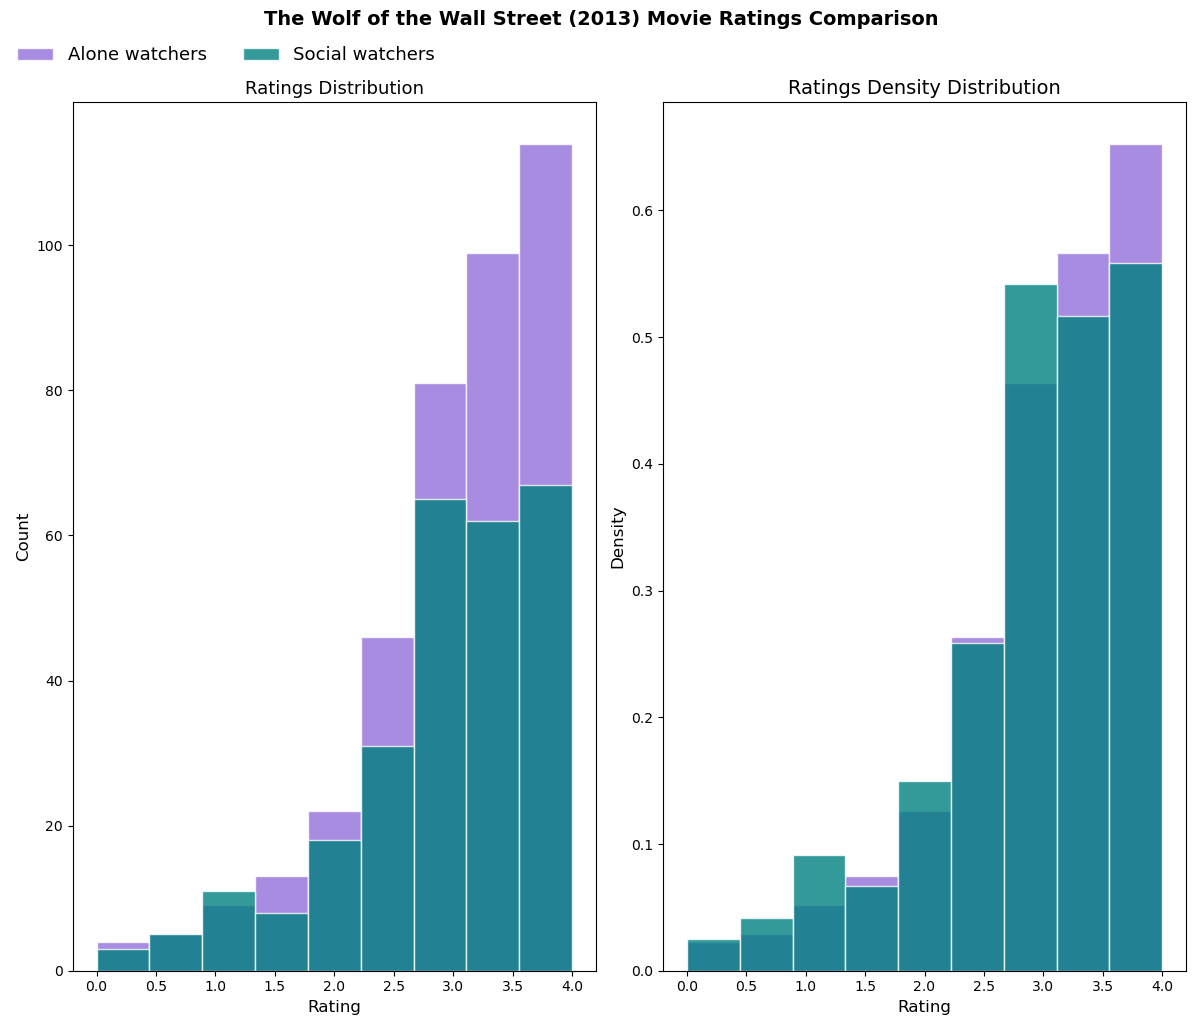

In [59]:
# preparing the graph
fig, axes = plt.subplots(1, 2, figsize=(12,10))

# Alone watchers 
axes[0].hist(alone_watchers, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8)
axes[0].hist(social_watchers, bins=9, color="teal", edgecolor="white", alpha=0.8)

# aesthetics
axes[0].set_title("Ratings Distribution", fontsize=13)
axes[0].set_xlabel("Rating", fontsize = 12)
axes[0].set_ylabel("Count", fontsize = 12)

# Social watchers 
axes[1].hist(alone_watchers, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8, density = True)
axes[1].hist(social_watchers, bins=9, color="teal", edgecolor="white", alpha=0.8, density = True)
axes[1].set_title("Ratings Density Distribution", fontsize=14)
axes[1].set_xlabel("Rating", fontsize = 12)
axes[1].set_ylabel("Density", fontsize = 12)



# common title
plt.suptitle("The Wolf of the Wall Street (2013) Movie Ratings Comparison", fontsize=14, fontweight = "bold", 
             y = 1.02)


# common legend 
fig.legend(["Alone watchers", 
            "Social watchers"], 
            fontsize = 13,
            loc = "upper left", 
            ncol = 2,
            bbox_to_anchor = (0, 1),
            frameon = False)


plt.tight_layout()
plt.show()


Both groups show clear left-skewed distributions, meaning most people rated the movie on the higher end of the scale. It’s pretty obvious that The Wolf of Wall Street (2013) was well-received overall, since lower ratings are rare in both groups. The overall picture doesn’t show any strong difference - both groups seem to have genuinely enjoyed the movie, and the shape of their distributions tells the same story: high ratings dominate regardless of how they watched it. We need to test this relationship statistically. 

### Mann-Whitney U Test (one-sided)
`Rationale for test:` We can not use parametric tests as we are not aware of population parameters such as mean or standard deviation, and our data is not normally distributed. We also can not use parametric tests such as t-test, because movie ratings are ordinal as it was said before. We should use non-parametric one-sided Mann-Whitney U test for ordinal data that compares median values of samples. 

It is time to assign our Null and Alternative hypotheses for the test. 

`Null hypothesis (H0):` Median rating of `The Wolf of Wall Street (2013)` movie is the same for social and alone watchers. 

`Alternative hypothesis (Ha):` Median rating of social watchers for `The Wolf of Wall Street (2013)` movie is significantly greater than the median rating of alone watchers. 

`Significance level:` 0.005

`Interpretation of p-value:` Probability of observing the data (or more extreme data) if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely under the null hypothesis, so we reject the H0 and conclude that the median rating of social watchers for `The Wolf of Wall Street (2013)` movie is significantly greater than the median rating of alone watchers. If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0. 

In [60]:
# conduct the test with statistic and p-values
u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='greater')

# use the significance function created 
significance(0.005, p_value)

p = 0.943666 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


Since the p-value (0.943666) is greater than the significance level α = 0.005, we fail to reject the null hypothesis. This means that the observed difference in enjoyment of The Wolf of Wall Street (2013) between people who watch movies socially and those who watch them alone is not statistically significant and could appear just by a chance. 

In other words, the data do not provide sufficient evidence to conclude that people who like to watch movies socially enjoy the film more than those who prefer to watch alone. Any difference observed in the sample is likely due to random variation rather than a true difference in the population. 

## Q8 - What proportion of movies exhibit such a “social watching” effect? 


In [61]:
# copy the data for question 8 to avoid changes 
q8_df = df.copy()

# mask for movie columns 
movie_columns = q8_df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [62]:
# checking the needed column 
social_column = q8_df.iloc[:, 476]
social_column.value_counts()


movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)
 1    610
 0    462
-1     25
Name: count, dtype: int64

### Mann-Whitney U Test (one-sided)

`Rationale for the test:`For this question, we estimate the proportion of movies for which viewers who prefer watching movies socially rate the movie higher than viewers who prefer watching alone. Movie ratings are ordinal and do not satisfy normality assumptions. Population parameters such as the mean and standard deviation are unknown. Parametric tests are therefore not appropriate.

We apply a non-parametric Mann-Whitney U test separately for each movie. This test evaluates whether typical enjoyment differs between social watchers and alone watchers in the direction specified by the research question. 

Hypotheses for each movie: 

`Null Hypothesis H0:` The median rating of the movie for social watchers is equal to the median rating for alone watchers.

`Alternative hypothesis Ha:` The median rating of the movie for social watchers is greater than the median rating for alone watchers.

This is a one sided test because a “social watching effect” is defined as higher enjoyment among social watchers.

`Interpretation:`For each movie, if the p value is smaller than 0.005, we reject H0 and conclude that the movie exhibits a statistically significant social watching effect in terms of typical enjoyment.
If the p value is larger than 0.005, we fail to reject H0 and conclude that any observed difference is consistent with random variation.

The final result is reported as the proportion of movies for which H0 is rejected. This proportion represents the share of movies that are enjoyed more by viewers who prefer watching movies socially.


In [63]:
# significance level 
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_social = []
results_q8_u = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    social_watchers = q8_df.loc[q8_df[social_column.name] == 0, movie].dropna()
    alone_watchers = q8_df.loc[q8_df[social_column.name] == 1, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='greater')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_social.append(movie)

        # save data as well
        results_q8_u.append({
        "movie": movie,
        "n_social_watchers": len(social_watchers),
        "n_alone_watchers": len(alone_watchers),
        "U": u_statistic,
        "p_value": p_value
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{round(( len(significant_movies_social) / len(movie_columns) ) * 100, 2)}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_social)}")
# # list of movies 
# for i in significant_movies_social:
#     print(f"\n{i}\n")

Proportion of movies that had significant results:1.5%
Number of movies with significant results:6


We can see that only few (1.5% - 6) movies exhibit such a "social watching" effect. 

In [66]:
# convert results to dataframe
df_results_q8 = pd.DataFrame(results_q8_u).copy()

# compare and sort values from decreasing to increasing by p-value
df_results_q8.sort_values(by = ['p_value'],
                       ascending= False)


,movie,n_social_watchers,n_alone_watchers,U,p_value
0,north (1994),39,35,942.0,0.002348
4,the transporter (2002),92,99,5619.0,0.002333
3,spider-man (2002),367,459,94401.0,0.001180
2,the avengers (2012),340,412,78946.0,0.000999
5,captain america: civil war (2016),243,293,41362.0,0.000475
1,shrek 2 (2004),410,535,124562.0,0.000140


### Extra Credit - Analyzing effect size between viewers who enjoy watching movies socially and alone

As introduced in earlier questions, we use Cliff's Delta (δ) as a non-parametric measure of effect size suitable for ordinal movie ratings. Cliff's delta quantifies the magnitude and direction of differences in ratings between two groups and complements rank-based hypothesis tests by providing a measure of practical significance.

In this question, Cliff's delta is computed only for movies flagged as statistically significant by the corresponding hypothesis tests. This avoids redundant testing and focuses the effect size analysis on movies where a meaningful difference in enjoyment is already supported by statistical evidence.

Effect size interpretation follows the thresholds defined earlier:

|δ| < 0.15 = negligible effect

0.15 ≤ |δ| < 0.33 = small effect

0.33 ≤ |δ| < 0.47 = medium effect

|δ| ≥ 0.47 = large effect

The sign of δ indicates which group tends to rate the movie higher, relative to the reference group.

#### Mann-Whitney U Test (two-sided)

`Rationale for the test:`For this analysis, we examine differences in movie enjoyment between two independent groups. Movie ratings are ordinal and do not satisfy normality assumptions. Population parameters such as the mean and standard deviation are unknown. Parametric tests such as the t-test are therefore not appropriate.

We use a non-parametric Mann-Whitney U test, which is suitable for comparing two independent ordinal samples. The test evaluates whether one group tends to give higher ratings than the other by comparing rank distributions, making it appropriate for assessing differences in typical enjoyment without assuming normality or equal variances.

The Mann-Whitney U test is used here as a screening test to identify movies for which typical ratings differ between groups. Effect sizes are then computed only for movies that show statistically significant differences.

Hypotheses for each movie 

`Null hypothesis H0:` The median rating of the movie is equal between the two groups.
`Alternative hypothesis Ha:` The median rating of the movie differs between the two groups.

This is a two sided test because we are interested in whether typical enjoyment differs, not whether one group necessarily rates higher.

`Significance level:` 0.005

`Interpretation:` The p value represents the probability of observing the sample difference, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, we reject H0 and conclude that the movie exhibits a statistically significant difference in typical enjoyment between the two groups.
If the p value is larger than 0.005, we fail to reject H0 and conclude that the observed difference is consistent with random variation.

In [67]:
# significance level
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_social = []
results_q8_mann= []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    alone_watchers = q8_df.loc[q8_df[social_column.name] == 1, movie].dropna()
    social_watchers = q8_df.loc[q8_df[social_column.name] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_social.append(movie)

        # calculate cliff's delta 
        delta, level = cliffs_delta.cliffs_delta(social_watchers, 
                                                 alone_watchers)
        
        # save data as well
        results_q8_mann.append({
        "movie": movie,
        "n_social_watchers": len(social_watchers),
        "n_alone_watchers": len(alone_watchers),
        "U": u_statistic,
        "p_value": p_value, 
        "delta": delta, 
        "level":level
    })


In [69]:
# convert results to dataframe
df_results_q8_cliff = pd.DataFrame(results_q8_mann).copy()
# removing negligible results 
df_results_q8_cliff = df_results_q8_cliff.loc[df_results_q8_cliff["level"]!= "negligible"]

# printing out results sorted by the largest effect
df_results_q8_cliff.sort_values(by = "delta", 
                                ascending= False)




,movie,n_social_watchers,n_alone_watchers,U,p_value,delta,level
1,north (1994),39,35,942.0,0.004696,0.380220,medium
8,the transporter (2002),92,99,5619.0,0.004666,0.233860,small
9,captain america: civil war (2016),243,293,41362.0,0.000950,0.161870,small
2,inglorious bastards (2009),168,257,18197.0,0.004998,-0.157078,small
0,the silence of the lambs (1991),203,291,24344.5,0.000554,-0.175783,small
7,apocalypse now (1979),69,98,2498.5,0.003731,-0.261017,small
6,donnie darko (2001),94,149,5051.5,0.000198,-0.278666,small


`Key Results:` 
- Only 7 movies show a statistically significant difference in typical enjoyment between social watchers and alone watchers at α = 0.005. All detected effects are small to medium in magnitude. This indicates that a social watching effect exists, but it is rare and generally modest.

`Movies rated higher by social watchers (δ > 0):`
- North (1994) - medium effect (δ ≈ 0.38)
- The Transporter (2002) - small effect
- Captain America: Civil War (2016) - small effect
- Social context likely enhances enjoyment through collective reactions and engagement.

`Movies rated higher by alone watchers (δ < 0):`
- Inglorious Bastards (2009) - small effect
- The Silence of the Lambs (1991) - small effect
- Apocalypse Now (1979) - small effect
- Donnie Darko (2001) - small effect

`Interpretation:`
- Only a small subset of movies shows a meaningful difference in enjoyment between social watchers and viewers who prefer watching alone. When a social watching effect is present, the magnitude is generally small, with one medium effect observed. This suggests that social context influences enjoyment for certain titles, but the effect is not widespread and should not be assumed for most movies.

- Movies rated higher by social watchers tend to benefit from shared reactions, humor, or spectacle, where group dynamics enhance engagement. In contrast, movies rated higher by alone watchers are often more introspective, tense, or psychologically demanding, where solitary viewing may improve focus and immersion.

`Business Importance:` 
- Use the social watching signal only for movies with medium or meaningful Cliff's delta, where practical relevance is supported.

- Slightly favor socially rated movies for users who report enjoying group viewing when other recommendation signals are similar.


## Q9 - Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  


In [70]:
# taking filter mask for necessary columns
columns_q9 = ["home alone (1990)", 
           "finding nemo (2003)"]

# subset with 2 columns: 
q9_df = df.loc[:, columns_q9].copy()

# first 5 rows of the subset
q9_df.head(5)

,home alone (1990),finding nemo (2003)
0,4.0,3.5
1,4.0,4.0
2,4.0,3.5
3,1.5,2.5
4,2.0,2.5


Since we now successfully created subset of the data for question, 
we can divide the data into two series groups, while also droping null values in each group.
1) Home Alone (1990) movie
2) Finding Nemo (2003) movie

In [71]:
# columns with names of the movies
col_alone = columns_q9[0]
col_nemo = columns_q9[1]

# Home alone movie 
home_alone = q9_df[col_alone].dropna()
# Finding Nemo movie
finding_nemo = q9_df[col_nemo].dropna()

In [72]:
# number of rows in each series 
print(f"Number of ratings that Home Alone movie has:{home_alone.shape[0]} rows")
print(f"Number of ratings that Finding Nemo movie has:{finding_nemo.shape[0]} rows")

Number of ratings that Home Alone movie has:857 rows
Number of ratings that Finding Nemo movie has:1014 rows


Both movies have equal numbers of rows, so we can proceed with the analysis. 

### Distributions

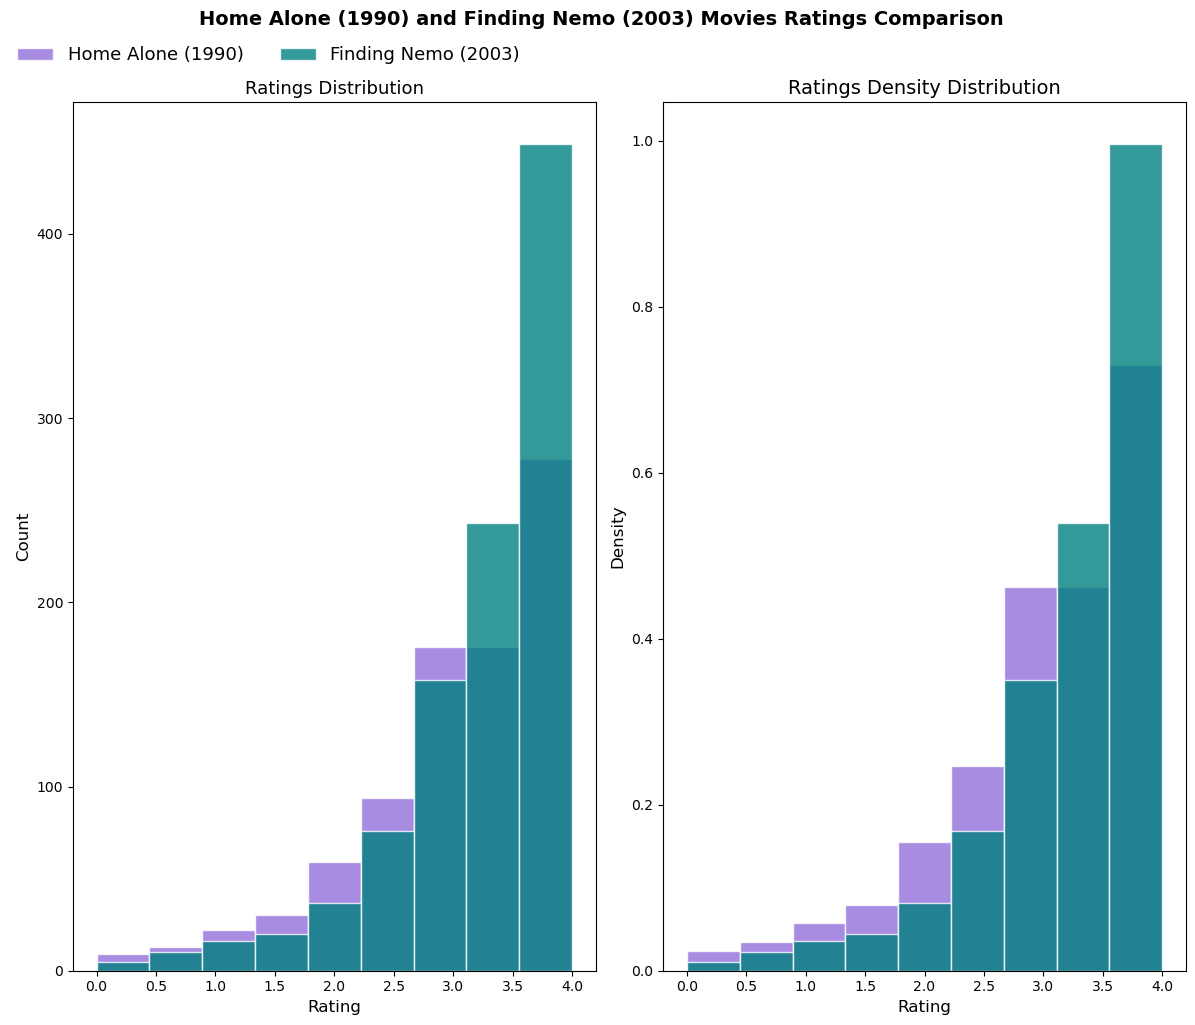

In [73]:
# preparing the graph
fig, axes = plt.subplots(1, 2, figsize=(12,10))

# Alone watchers 
axes[0].hist(home_alone, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8)
axes[0].hist(finding_nemo, bins=9, color="teal", edgecolor="white", alpha=0.8)

# aesthetics
axes[0].set_title("Ratings Distribution", fontsize=13)
axes[0].set_xlabel("Rating", fontsize = 12)
axes[0].set_ylabel("Count", fontsize = 12)

# Social watchers 
axes[1].hist(home_alone, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8, density = True)
axes[1].hist(finding_nemo, bins=9, color="teal", edgecolor="white", alpha=0.8, density = True)
axes[1].set_title("Ratings Density Distribution", fontsize=14)
axes[1].set_xlabel("Rating", fontsize = 12)
axes[1].set_ylabel("Density", fontsize = 12)



# common title
plt.suptitle("Home Alone (1990) and Finding Nemo (2003) Movies Ratings Comparison", fontsize=14, fontweight = "bold", 
             y = 1.02)


# common legend 
fig.legend(["Home Alone (1990)", 
            "Finding Nemo (2003)"], 
            fontsize = 13,
            loc = "upper left", 
            ncol = 2,
            bbox_to_anchor = (0, 1),
            frameon = False)


plt.tight_layout()
plt.show()


Both movies show a strong left-skewed distribution, meaning most viewers rated them on the higher end of the scale. However, the difference in height and shape between the bars suggests that Finding Nemo (2003) generally received higher and more consistent ratings than Home Alone (1990). The tallest bars for Finding Nemo at the 4.0 rating level show that a much larger share of people gave it top marks, while Home Alone ratings are slightly more spread between 2.0 and 3.5. The density plot reinforces this - Finding Nemo’s curve rises sharply and dominates across higher rating bins, indicating that its ratings are both more concentrated and more favorable overall. In short, both films were well liked, but Finding Nemo stands out as being more universally enjoyed and consistently rated higher.

We need to test that statistically. 

### Kolmogorov - Smirnov (KS) Test (two-sided)

`Rationale for the test:` For this question, we compare the full rating distributions of two movies. Movie ratings are ordinal and do not satisfy normality assumptions. Population parameters such as the mean and standard deviation are unknown. Parametric tests are therefore not appropriate.

We apply a two sample Kolmogorov-Smirnov (KS) test, which is suitable for comparing entire distributions without assuming any specific distributional form. Unlike tests that focus only on central tendency, the KS test detects differences in shape, spread, or skewness between two samples.

Hypotheses: 

`Null hypothesis H0:` The rating distributions of `Home Alone (1990)` and `Finding Nemo (2003)` come from the same population distribution.

`Alternative hypothesis Ha:` The rating distributions of `Home Alone (1990)` and `Finding Nemo (2003)` come from different population distributions.

This is a two sided test because the question asks whether the distributions differ in any way, not whether one movie is rated higher than the other.

`Significance Level:` 0.005 

`Interpretation:` The p value represents the probability of observing the maximum difference between the two empirical cumulative distribution functions, or a more extreme one, assuming the null hypothesis is true.

If the p value is smaller than 0.005, we reject H0 and conclude that the rating distributions of `Home Alone (1990)` and `Finding Nemo (2003)` are significantly different. If the p value is larger than 0.005, we fail to reject H0 and conclude that any observed difference in distributions is consistent with random variation.

In [74]:
# conduct the test with statistic and p-values
d_statistic, p_value = stats.kstest(home_alone, finding_nemo, alternative='two-sided')

# usage
significance(0.005, p_value)

p = 6.3794e-10 < α = 0.005 = Reject H0 (statistically significant).


Since the p value (6.3794e-10) is smaller than the significance level α = 0.005, we reject the null hypothesis. This provides statistically significant evidence that the rating distributions of `Home Alone (1990)` and `Finding Nemo (2003)` are different. The observed difference is unlikely to be due to random variation alone.

## Q10 - There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? 

### Kruskal-Wallis Test (two-sided)

`Rationale for the test:` 
For this question, we examine whether movie ratings within each franchise are consistent across installments. Each franchise contains more than two movies, and ratings are ordinal and do not satisfy normality assumptions. Population parameters such as the mean and standard deviation are unknown. Parametric tests are therefore not appropriate.

We apply a Kruskal-Wallis H test separately for each franchise. This non-parametric test compares ratings across multiple independent groups and evaluates whether at least one movie within a franchise differs in perceived quality from the others.

Hypotheses for each franchise:  

`Null hypothesis H0:` All movies within the franchise have the same rating distribution.

`Alternative hypothesis Ha:` At least one movie within the franchise has a different rating distribution.

`Significance level:` 0.005

`Interpretation:` If the p value is smaller than 0.005, we reject H0 and conclude that the franchise exhibits inconsistent perceived quality across its movies. If the p value is larger than 0.005, we fail to reject H0 and conclude that there is no statistically significant evidence of quality inconsistency.

In [77]:
# copy the data for question 10 to avoid changes
q10_df = df.copy()

# list of franchises
franchises = [
    "star wars",
    "harry potter",
    "the matrix",
    "indiana jones",
    "jurassic park",
    "pirates of the caribbean",
    "toy story",
    "batman"
]

# empty lists to hold analysis results
Hvalues = []
pvalues = []

for movie_series in franchises:
    res = franchise_analysis(q10_df, movie_series)
    Hvalues.append(res["H"])
    pvalues.append(res["p"])
    
    print(f"Franchise: {movie_series} \t # of Movies: {len(res['movies'])}")

# results 
df_results = pd.DataFrame({
    "Franchise": franchises,
    "p": pvalues,
    "H": Hvalues,
    #"Movies": movies_per_franchise
})

df_results["significance"] = df_results["p"] < 0.005

Franchise: star wars 	 # of Movies: 6
Franchise: harry potter 	 # of Movies: 4
Franchise: the matrix 	 # of Movies: 3
Franchise: indiana jones 	 # of Movies: 4
Franchise: jurassic park 	 # of Movies: 3
Franchise: pirates of the caribbean 	 # of Movies: 3
Franchise: toy story 	 # of Movies: 3
Franchise: batman 	 # of Movies: 3


In [78]:
# show results in the dataset
df_results

,Franchise,p,H,significance
0,star wars,8.016477e-48,230.584175,True
1,harry potter,3.433195e-01,3.331231,False
2,the matrix,3.123652e-11,48.378867,True
3,indiana jones,6.272776e-10,45.794163,True
4,jurassic park,7.636930e-11,46.590881,True
5,pirates of the caribbean,3.290129e-05,20.643998,True
6,toy story,5.065805e-06,24.385995,True
7,batman,4.225297e-42,190.534969,True


We test whether movie ratings within each franchise are consistent across installments. A significant result indicates inconsistent perceived quality.

`From the results:`
- Star Wars. Significant. Inconsistent quality.
- Harry Potter. Not significant. Consistent quality.
- The Matrix. Significant. Inconsistent quality.
- Indiana Jones. Significant. Inconsistent quality.
- Jurassic Park. Significant. Inconsistent quality.
- Pirates of the Caribbean. Significant. Inconsistent quality.
- Toy Story. Significant. Inconsistent quality.
- Batman. Significant. Inconsistent quality.

`Final answer:`
- 7 out of 8 franchises exhibit inconsistent quality as experienced by viewers.
- Only Harry Potter shows no statistically significant evidence of quality inconsistency across its movies.